## Primer Examen Parcial 

# Damian Elizondo Lizeth Abigail 
# 5BV1
# Nota: 
>> Una disculpa por usar python pero no me quedaba en c++ y se terminaba rompiendo el programa :( 

- Dimensiones de la imagen: 
(1291, 719, 3)


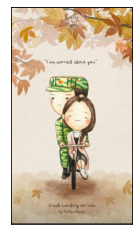

In [7]:
## Mostrar la imagen original 
import cv2 
import matplotlib.pyplot as plt 

imgBGR = cv2.imread('examen.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) ##Esta funcion ayuda a que se muestre la imagen original con los colores reales de la imagen 
plt.xticks([])
##Ayuda a que no se muestre la imagen con las medidas de la imagen
plt.yticks([])
plt.imshow(imgRGB); 
print("- Dimensiones de la imagen: ")
print(imgRGB.shape)
##Mostramos la imagen original con los colores originales
plt.show()

In [14]:
##Cambiar la imagen a grises 
import cv2 
from PIL import Image
import numpy as np 

def escalaGrises():
    arr_image = Image.open('examen.jpg') ##Leemos la imagen 
    array_image =np.array(arr_image)
    array_zeros = np.zeros((array_image.shape[0], array_image.shape[1])) 
    ##Iniciamos con la funcion usando for e if para poder hacer el cambio de imagen a grises 
    for n in (range(array_image.shape[0])):
        for m in (range(array_image.shape[1])):
            R=0
            G=0
            B=0
            suma = 0
            for j in (range(array_image.shape[2])): ##Vamos a acceder a los valores del RGB
                if j == 0: 
                    R = array_image[n, m, j]*0.3
                    suma= suma+R
                elif j == 1: 
                    G = array_image[n, m, j]*0.59
                    suma= suma+G
                else: 
                    B = array_image[n, m, j]*0.11
                    suma= suma+B
            array_zeros[n, m] = suma 

    cv2. imwrite("imagenEscala.jpg", array_zeros)
    variable=cv2.imread("imagenEscala.jpg")
    cv2.imshow('Hola', variable)
    cv2.waitKey(0)

escalaGrises()


In [15]:
## Suavizado de las imagenes 
import cv2
import numpy as np 

## Abrimos la imagen 
img= cv2.imread('examen.jpg')

##Creamos nuestro kernel 

kernel3x3= np.ones((3,3),np.float32)/9.0
kernel5x5= np.ones((5,5),np.float32)/25.0

salidas3=cv2.filter2D(img, -1, kernel3x3)
salidas5=cv2.filter2D(img, -1, kernel5x5)

cv2.imshow('salida3', salidas3)
cv2.imshow('salida5', salidas5)

cv2.waitKey(0)


-1

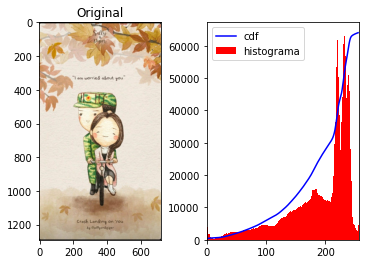

In [3]:
## Imagen Ecualizada 
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

imgBGR = cv2.imread('examen.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

## usamos la funcion para obtener de una matriz obtener un vector
hist, bins = np.histogram(imgRGB.flatten(), 256, [0, 256])

## Obtenemos la funcion de la distribucion acumulada del historama 

cdf = hist.cumsum() ##Se hace la suma acumulada
cdf_normalized = cdf * hist.max()/cdf.max() ## Se normaliza

##En esta parte graficamos nuestro histograma
plt.subplot(121)
plt.imshow(imgRGB, cmap = 'gray'), plt.title('Original')
plt.subplot(122)
plt.plot(cdf_normalized, color = 'b')
plt.hist(imgRGB.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histograma'), loc = 'upper left')
plt.show()

##Realizamos la ecualizacion del histograma 

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) ## Se le resta el minimo a la suma acumulada y se divide entre la region
cdf = np.ma.filled(cdf_m, 0).astype('uint8') 
##Se pasa a una nueva variable obteniendo el histograma ecualizacion
img2 = cdf[imgRGB]









In [16]:
## Imagen resultado de aplicar el filtro gaussiano
import cv2
import numpy as np 

## Abrimos la imagen 
img= cv2.imread('examen.jpg')

filtroGausiano=cv2.GaussianBlur(img,(5,5),0)
##El filtro Gaussiano lo usamos para elimnar ruido, sin embargo no es el mejor filtro que podemos usar depende del tipo 
##De imagenes 
cv2.imshow('Filtro Gaussiano', filtroGausiano)

cv2.waitKey(0)


-1

In [1]:
## Detector de bordes Sobel y Canny
import cv2
import numpy as np 
##Leemos la imagen 
img=cv2.imread('examen.jpg')
img=cv2.cvtColor( img, cv2.COLOR_BGR2GRAY) ## Con sobel necesitamos trabajar con una imagen en escala de grises y esta funcion nos ayuda
Canny= cv2.Canny(img, 50, 240)##Si el pixel esta fuera del rango no habra desborde porque no lo deja pasar
imgSobel=cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3) ## Aplicamos el filtro sobel

##Mostramos las imagenes con deteccion de bordes 
cv2.imshow("Imagen Sobel", imgSobel)
cv2.imshow("Imagen Canny", Canny)

cv2.waitKey(0)

-1